# Naive Bayes Classifier

## This notebook demonstrates the implementation of the Naive Bayes algorithm for classification tasks. It includes:
- Data preprocessing
- Training a Naive Bayes model
- Model evaluation using confusion matrix, ROC curve, and other metrics
- Visualizing important features

In [39]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt 



## 1.Load dataset

In [40]:
df = pd.read_csv("spam_dataset.csv")

In [41]:
df

,text,label
0,Can you share the minutes of the last meeting?,not spam
1,This is not a scam. Transfer your funds now to...,spam
2,Act now! Limited time offer for exclusive memb...,spam
3,Act now! Limited time offer for exclusive memb...,spam
4,Attached is the invoice for your recent purchase.,not spam
...,...,...
95,Thanks for your feedback on the recent project.,not spam
96,Thanks for your feedback on the recent project.,not spam
97,Looking forward to our call on Friday.,not spam
98,Reminder: Your appointment is scheduled for 10...,not spam


## 2. separating X(input column) and y(output column)

In [42]:
X = df['text']

In [43]:
y = df['label']

## Graph of Spam vs Ham(not spam)

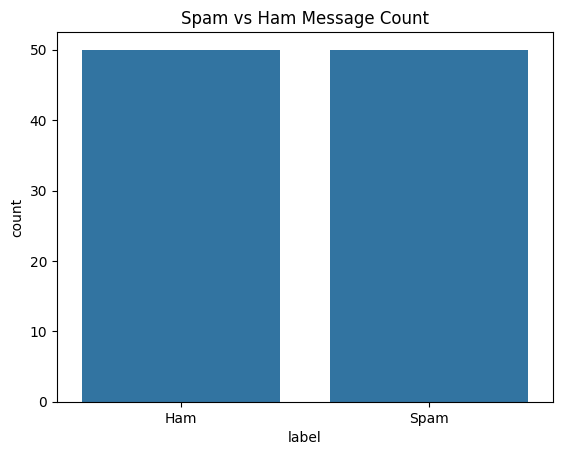

In [44]:
sns.countplot(x='label', data=df)
plt.xticks([0,1], ['Ham', 'Spam'])
plt.title("Spam vs Ham Message Count")
plt.show()


## 3. Encoding the y(output variable)


In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
 le = LabelEncoder()

In [8]:
k = le.fit_transform(y)

## 4. Vectorize the Input Variable(x) which is in text form

In [9]:
 from sklearn.feature_extraction.text import CountVectorizer

In [10]:
cv = CountVectorizer()

In [11]:
cv.fit(X)

CountVectorizer()

In [12]:
v=cv.transform(X)

In [13]:
print(df)

                                                 text     label
0      Can you share the minutes of the last meeting?  not spam
1   This is not a scam. Transfer your funds now to...      spam
2   Act now! Limited time offer for exclusive memb...      spam
3   Act now! Limited time offer for exclusive memb...      spam
4   Attached is the invoice for your recent purchase.  not spam
..                                                ...       ...
95    Thanks for your feedback on the recent project.  not spam
96    Thanks for your feedback on the recent project.  not spam
97             Looking forward to our call on Friday.  not spam
98  Reminder: Your appointment is scheduled for 10...  not spam
99  Congratulations! You've won a free vacation. C...      spam

[100 rows x 2 columns]


## 5. Using Multinomial Naive Bayes for text classification problem


In [14]:
from sklearn.naive_bayes import MultinomialNB


In [15]:
mn = MultinomialNB()

In [16]:
from sklearn.model_selection import train_test_split


In [17]:
X_train,X_test,y_train,y_test = train_test_split(v,k,test_size=0.2,random_state=42)

In [18]:
X

0        Can you share the minutes of the last meeting?
1     This is not a scam. Transfer your funds now to...
2     Act now! Limited time offer for exclusive memb...
3     Act now! Limited time offer for exclusive memb...
4     Attached is the invoice for your recent purchase.
                            ...                        
95      Thanks for your feedback on the recent project.
96      Thanks for your feedback on the recent project.
97               Looking forward to our call on Friday.
98    Reminder: Your appointment is scheduled for 10...
99    Congratulations! You've won a free vacation. C...
Name: text, Length: 100, dtype: object

In [19]:
mn.fit(X_train,y_train)

MultinomialNB()

In [20]:
y_pred = mn.predict(X_test)

In [21]:
y_pred

array([1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1])

In [22]:
y_test

array([1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1])

## 6. Classification Report

In [34]:
from sklearn.metrics import classification_report

In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        12

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



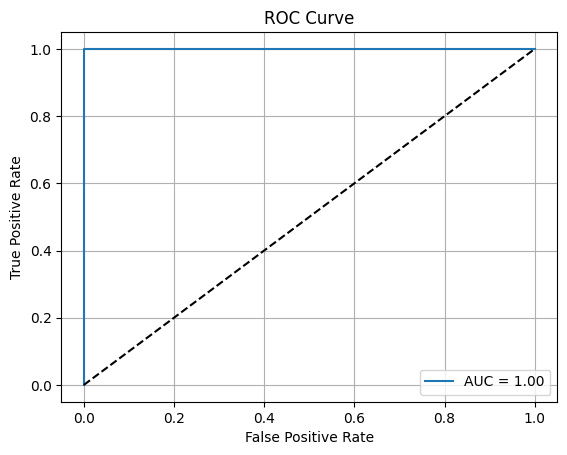

In [50]:
from sklearn.metrics import roc_curve, auc

y_proba = mn.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


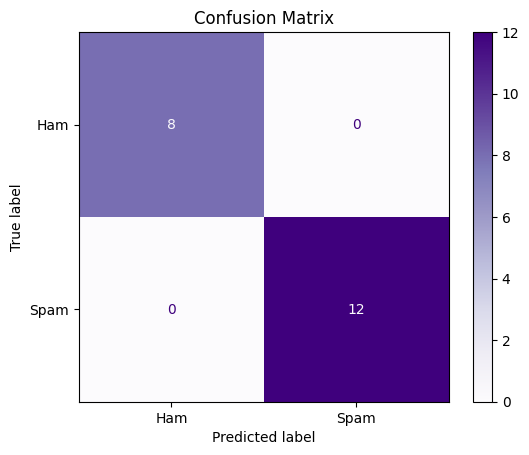

In [51]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Ham', 'Spam'])
disp.plot(cmap='Purples')
plt.title("Confusion Matrix")
plt.show()



## 7. Predicting Output for New input

In [36]:
mail = "this is not a scam you won the lottery"

In [31]:
mail=cv.transform([mail])

In [32]:
predict = mn.predict(mail)

In [33]:
predict

array([1])